In [1]:
import pandas as pd
import time
import os

In [2]:
strt = time.time()
vine_df = pd.read_csv('vine_table.csv')
endtime = time.time()
print(endtime-strt)

3.7485127449035645


In [3]:
df_filter = vine_df[vine_df['total_votes']>20]

In [4]:
df_helpful = df_filter[df_filter['helpful_votes']/df_filter['total_votes']>0.5]

In [5]:
vine_y = df_helpful[df_helpful['vine']=='Y']
vine_n = df_helpful[df_helpful['vine']=='N']

In [6]:
vine_y_tot = vine_y.shape[0] #total reviews
vine_n_tot = vine_n.shape[0]

vine_y_5 = vine_y[vine_y['star_rating']==5].shape[0]
vine_n_5 = vine_n[vine_n['star_rating']==5].shape[0]

vine_y_5pct = vine_y_5/vine_y_tot
vine_n_5pct = vine_n_5/vine_n_tot

In [7]:
results = pd.DataFrame([[vine_y_tot,vine_n_tot],
                        [vine_y_5,vine_n_5],
                        [vine_y_5pct, vine_n_5pct]],
                      columns = ["Vine=Y", "Vine=N"], index=['total', '5* count', 'pct 5*'])

In [8]:
results

,Vine=Y,Vine=N
total,1693.000000,72775.000000
5* count,746.000000,33980.000000
pct 5*,0.440638,0.466919


4.122268163024217

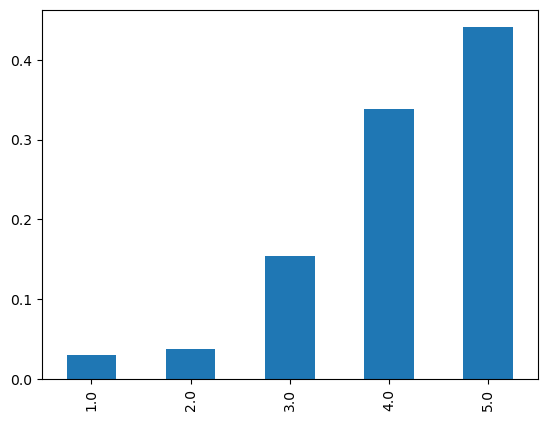

In [9]:
vine_y_rate = vine_y['star_rating'].value_counts()/vine_y.shape[0]
vine_y_rate.sort_index().plot.bar()
vine_y['star_rating'].mean()

3.600879422878736

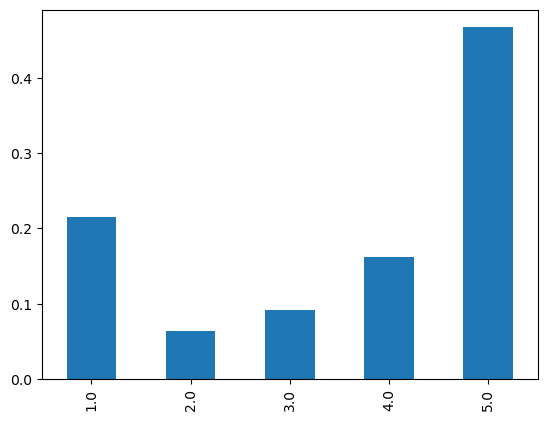

In [10]:
vine_n_rate= vine_n['star_rating'].value_counts()/vine_n.shape[0]
vine_n_rate.sort_index().plot.bar()
vine_n['star_rating'].mean()

### percent of 1* reviews in non-paid vine=N reviews is very high compared to the vine=Y set of 1* reviews
### so although the 5* percent is similar, the rest of the data suggests there is an impact on customer reviews correlated with vine=Y